In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pickle
from wordcloud import WordCloud
import seaborn as sns
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
real = pd.read_csv("/content/drive/MyDrive/true.csv")
fake = pd.read_csv("/content/drive/MyDrive/false.csv")

In [ ]:
real.shape

(49807, 5)

In [ ]:
fake.shape

(46950, 5)

In [ ]:
real.head()

,date,headline,content,newspaper,label
0,2023-08-05,10 best air beds for cosy camping and sleepovers,One of the most common worries for would-be ca...,Independent,0
1,2023-08-05,Explainer: How big oil won the bidding for Ger...,"Wind turbines, including some from RWE's new K...",reuters,0
2,2023-08-05,Goldman upgrades oil demand outlook as market ...,Model of Oil barrels are seen in front of risi...,reuters,0
3,2023-08-05,Jack Smith seeks protective order over Truth S...,Persecution’: Watch Trump’s reaction after lea...,Independent,0
4,2023-08-05,Sluggish return of business travelers forces U...,A mix of masked and unmasked travelers make th...,reuters,0


In [ ]:
fake.head()

,date,headline,content,newspaper,label
0,2013-01-02,Marijuana Legalization Causing Housing Boom in...,New numbers have come out indicating that in ...,humortimes,1
1,2013-01-02,NRA Head Wayne LaPierre Fits Profile Of 'Lone ...,"Wayne LaPierre, notorious leader of the gun c...",humortimes,1
2,2013-01-03,"Driven Mad by Politics, Americans Jump Like Le...",Driven to the brink of insanity by constant w...,humortimes,1
3,2013-01-03,Government plan to promote car travel 'going b...,THE government’s ongoing campaign to drive co...,thedailymash,1
4,2013-01-04,Jesus Cancels Second Coming Due to Lack of Int...,Coming down incognito to plan for his much-an...,humortimes,1


In [ ]:
fake.sample(5)

,date,headline,content,newspaper,label
32202,2021-03-10,Biden approval rating surges after he’s replac...,US—President Biden’s approval rating has surg...,genesiustimes,1
26517,2020-05-19,"‘This Is A Crazy Time, And It’s Okay If You’re...","BUCKHORN, CA—Telling the visibly fearful man t...",theonion,1
8348,2017-07-24,"Ripping the Headlines Today - Paul Lander, Hum...",The news doesn’t need to be complicated and c...,humortimes,1
13193,2018-05-05,Finally A Bubbler With A Bit Of Fucken Go Abou...,It is reportedly a world first for the local ...,thebetootaadvocate,1
40443,2022-06-19,Dream Come True: This Dad's Family Grilled Him...,There are many great ways to show your old ma...,clickholeNews,1


In [ ]:
fake.isnull().sum()

date         0
headline     0
content      0
newspaper    0
label        0
dtype: int64

In [ ]:
fake.dropna()

,date,headline,content,newspaper,label
0,2013-01-02,Marijuana Legalization Causing Housing Boom in...,New numbers have come out indicating that in ...,humortimes,1
1,2013-01-02,NRA Head Wayne LaPierre Fits Profile Of 'Lone ...,"Wayne LaPierre, notorious leader of the gun c...",humortimes,1
2,2013-01-03,"Driven Mad by Politics, Americans Jump Like Le...",Driven to the brink of insanity by constant w...,humortimes,1
3,2013-01-03,Government plan to promote car travel 'going b...,THE government’s ongoing campaign to drive co...,thedailymash,1
4,2013-01-04,Jesus Cancels Second Coming Due to Lack of Int...,Coming down incognito to plan for his much-an...,humortimes,1
...,...,...,...,...,...
46945,2023-07-06,EXCLUSIVE: Security tapes show AOC doing lines...,"WASHINGTON, DC—Genesius Times have obtained s...",genesiustimes,1
46946,2023-07-06,“We’ll be so easy!” promises table about to ru...,TORONTO – In a stunning display of complete l...,thebeaverton,1
46947,2023-07-06,Mennonite Grandma Smuggles Baking Powder into ...,"WASHINGTON, DC Mrs. Janzen of Goessel, Kansas...",theungerreview,1
46948,2023-07-07,Entrepreneur Who Stockpiled TP in Lockdown Now...,West Betoota Forklift driver Scott “Sorby” So...,thebetootaadvocate,1


In [ ]:
fake = fake.drop_duplicates()

In [ ]:
fake.shape

(46950, 5)

In [ ]:
real.isnull().sum()

date         0
headline     0
content      0
newspaper    0
label        0
dtype: int64

In [ ]:
real.dropna()

,date,headline,content,newspaper,label
0,2023-08-05,10 best air beds for cosy camping and sleepovers,One of the most common worries for would-be ca...,Independent,0
1,2023-08-05,Explainer: How big oil won the bidding for Ger...,"Wind turbines, including some from RWE's new K...",reuters,0
2,2023-08-05,Goldman upgrades oil demand outlook as market ...,Model of Oil barrels are seen in front of risi...,reuters,0
3,2023-08-05,Jack Smith seeks protective order over Truth S...,Persecution’: Watch Trump’s reaction after lea...,Independent,0
4,2023-08-05,Sluggish return of business travelers forces U...,A mix of masked and unmasked travelers make th...,reuters,0
...,...,...,...,...,...
49802,2023-09-11,A Tamil Nadu business which places its employe...,Techies Venkatesh Ramarathinam and his wife Ak...,timesofindia,0
49803,2023-09-11,"UP Crime News: Burglars take cash, gold, leave...",KANPUR: A house in in Krishna Vihar area of Na...,timesofindia,0
49804,2023-09-11,Ed Summons To Abhishek On Day Of Delhi India M...,KOLKATA: The Enforcement Directorate (ED) on S...,timesofindia,0
49805,2023-09-11,Saudi Arabia Crown Prince Salman meets PM Mod...,NEW DELHI: Saudi Arabian prime minister and cr...,timesofindia,0


In [ ]:
real = real.drop_duplicates()

In [ ]:
real.shape

(49807, 5)

In [ ]:
real.sample(5)

,date,headline,content,newspaper,label
7022,2023-08-10,The Elephant Whisperers: Oscar-winning Indian ...,A much-praised Oscar-winning Indian documentar...,bbc,0
4015,2023-08-08,Bernie Kerik Speaks To DOJ Jan. 6 Investigator...,"Bernie Kerik, a close ally of former President...",Huffpost,0
5729,2023-08-09,"In special op, Odisha police arrest 21, seize ...",In its crackdown against poachers in view of t...,indianexpress,0
48900,2023-09-10,Inside the talks leading to a step-down in the...,After hundreds of hours of negotiations and mo...,cnn,0
8520,2023-08-11,Fifth round of strikes begins for junior doctors,Junior doctors in England have begun their fif...,Independent,0


In [ ]:
real.head()

,date,headline,content,newspaper,label
0,2023-08-05,10 best air beds for cosy camping and sleepovers,One of the most common worries for would-be ca...,Independent,0
1,2023-08-05,Explainer: How big oil won the bidding for Ger...,"Wind turbines, including some from RWE's new K...",reuters,0
2,2023-08-05,Goldman upgrades oil demand outlook as market ...,Model of Oil barrels are seen in front of risi...,reuters,0
3,2023-08-05,Jack Smith seeks protective order over Truth S...,Persecution’: Watch Trump’s reaction after lea...,Independent,0
4,2023-08-05,Sluggish return of business travelers forces U...,A mix of masked and unmasked travelers make th...,reuters,0


In [ ]:
# Merging the text and title columns in one
real['text'] = real['headline'] + " " + real['content']
fake['text'] = fake['headline'] + " " + fake['content']

In [ ]:
# Converting the data to lower case
real['text'] = real['text'].apply(lambda x:str(x).lower())
fake['text'] = fake['text'].apply(lambda x:str(x).lower())

In [ ]:
df = pd.concat([real, fake], ignore_index=True)

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df = df[['text', 'newspaper', 'label']]

In [ ]:
df

,text,newspaper,label
0,pole vault pair agree to share gold medal: ‘di...,Independent,0
1,proud boy on house arrest disappears before ja...,Huffpost,0
2,ryanair charges elderly couple £110 after they...,theguardian,0
3,patrick brown announces re-re-entry into ontar...,thebeaverton,1
4,breaking: adrian peterson deactivated by famil...,theonion,1
...,...,...,...
96752,buffalo shooting survivors say social media co...,usnewsandworldreport,0
96753,"a new boiler, and other aggravating ways to bl...",thedailymash,1
96754,bitcoin is a bubble according to ageing proper...,thebetootaadvocate,1
96755,outreach event fails after toronto mennonite c...,theungerreview,1


In [ ]:
df.isnull().sum()

text         0
newspaper    0
label        0
dtype: int64

In [ ]:
print(df.dtypes)

text         object
newspaper    object
label         int64
dtype: object


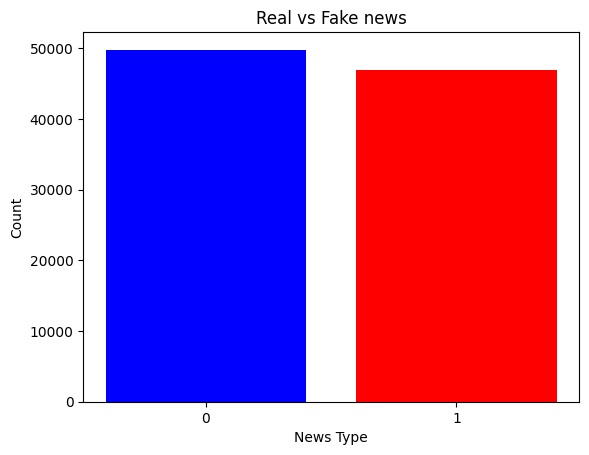

In [ ]:
counts = df['label'].value_counts()
labels = ['0', '1']
values = counts.values
colors = ['blue', 'red']
plt.bar(labels, values, color=colors)
plt.xlabel('News Type')
plt.ylabel('Count')
plt.title('Real vs Fake news')
plt.show()

In [ ]:
df['newspaper'] = df['newspaper'].str.lower()

In [ ]:
#df['newspaper']=df['newspaper'].astype(str)

In [ ]:
df['newspaper'].value_counts()

thebetootaadvocate       14384
independent              11622
theonion                  8221
thedailymash              7968
reuters                   7072
indianexpress             6622
thebeaverton              5637
theguardian               4783
usnewsandworldreport      4574
clickholenews             3276
genesiustimes             2936
theungerreview            2809
washingtonpost            2168
huffpost                  2024
timesofindia              1988
cnn                       1898
sidneymorningherald       1709
humortimes                1694
bbc                       1317
aljazeera                 1271
abc                       1157
usatoday                   968
politico                   634
waterfordwhispersnews       25
Name: newspaper, dtype: int64

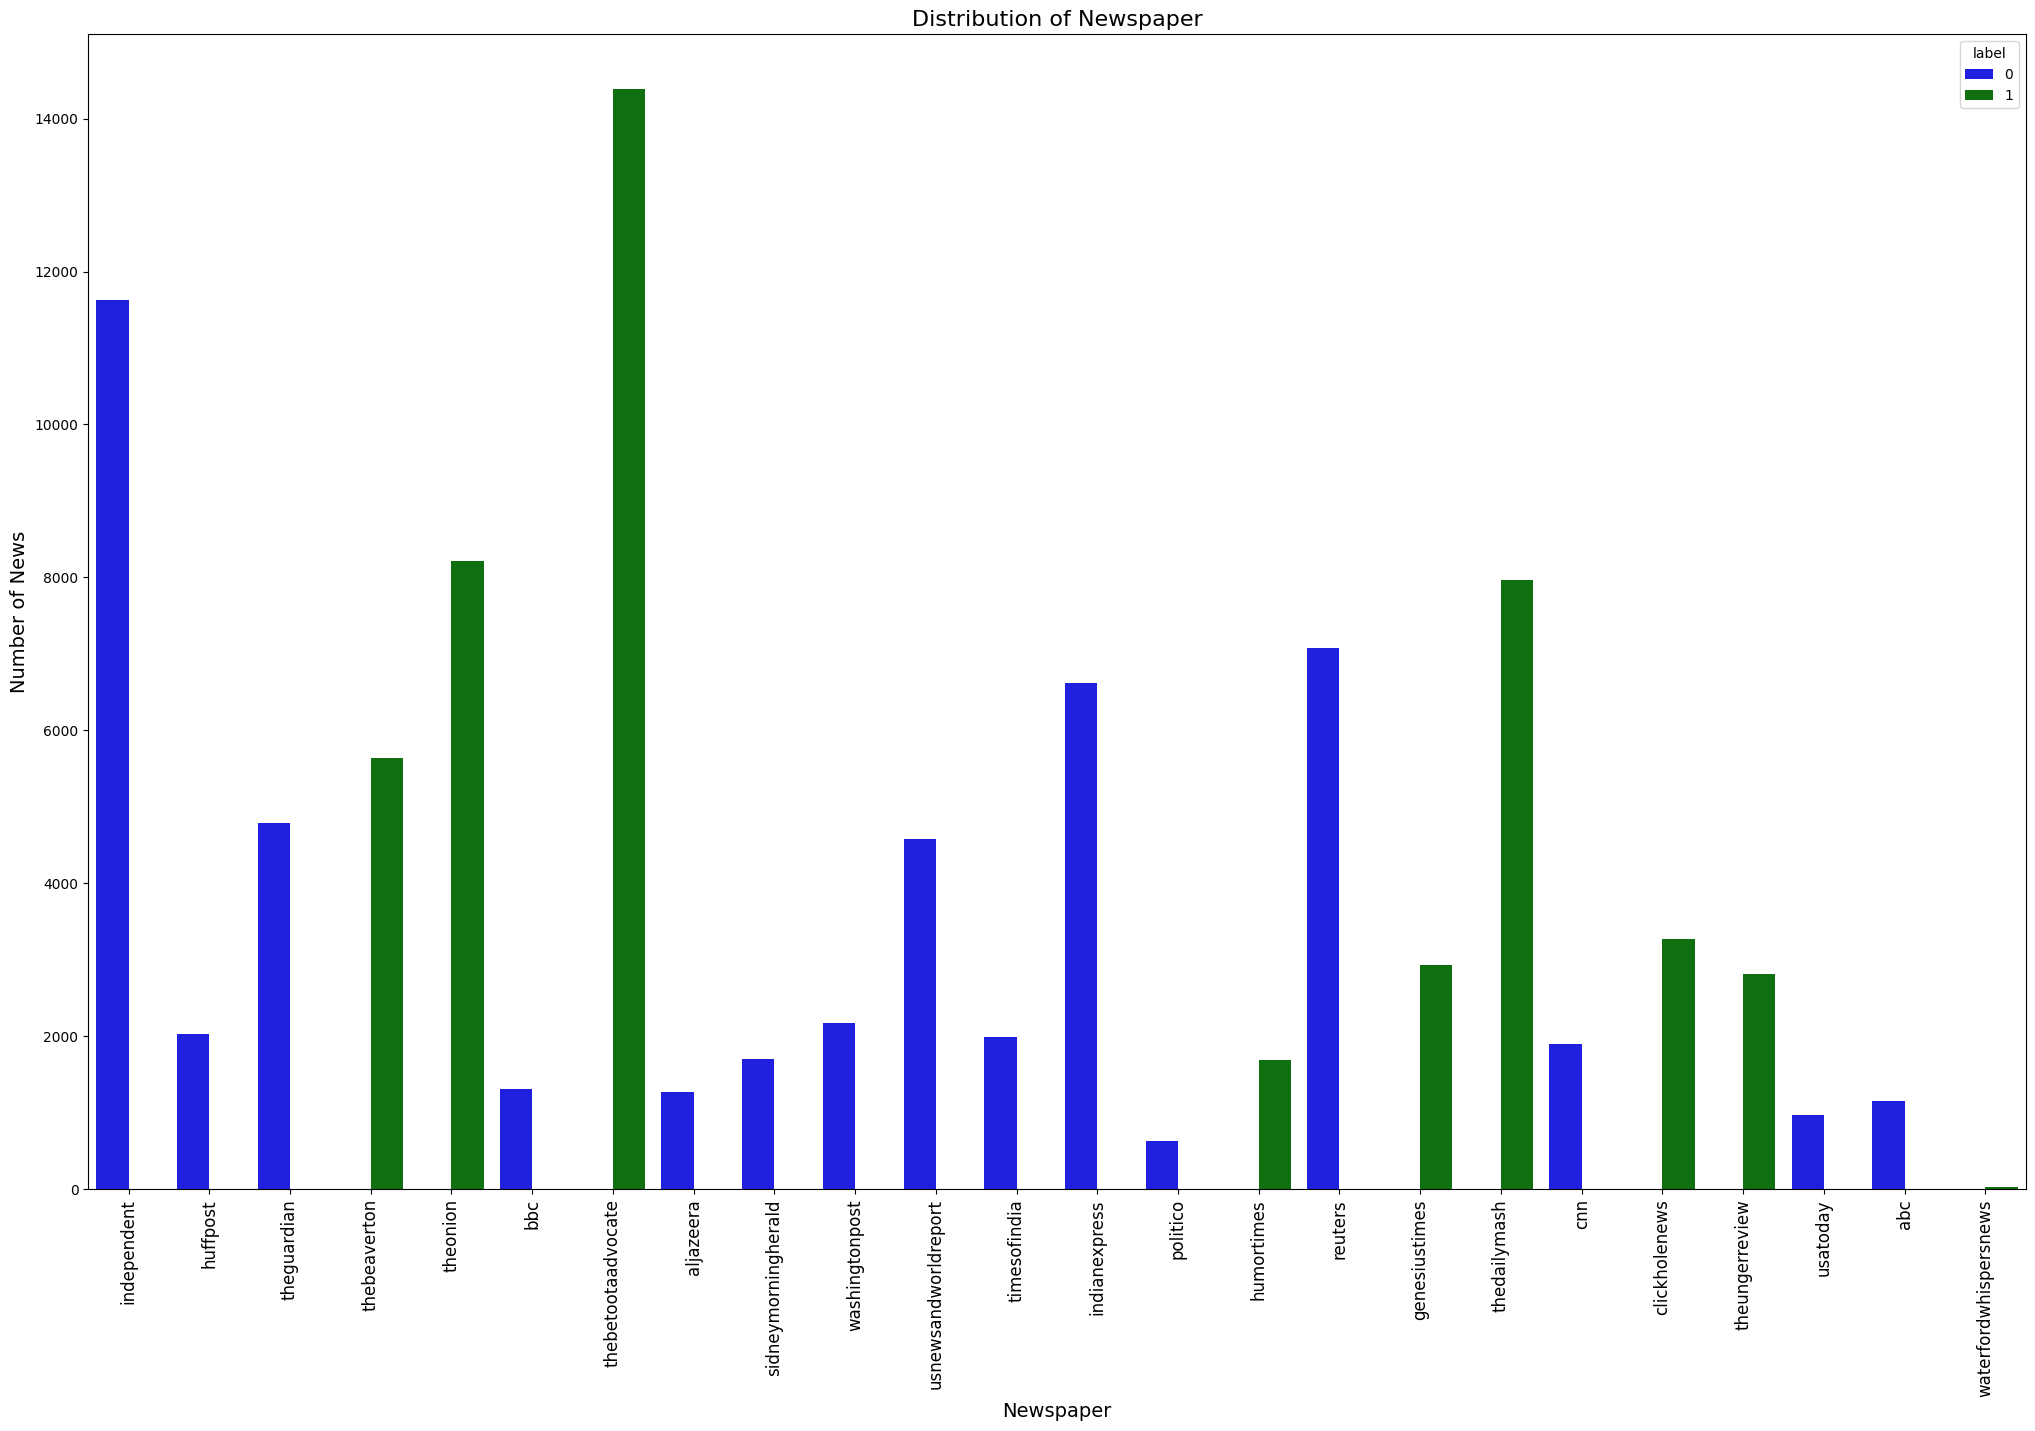

In [ ]:
colors = ['blue', 'green']

plt.figure(figsize=(25, 15))
sns.countplot(x=df['newspaper'], hue=df['label'], palette=colors)
plt.title('Distribution of Newspaper', fontsize=16)
plt.xlabel('Newspaper', fontsize=14)
plt.ylabel('Number of News', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [ ]:
def clean_text(text):
    text = re.sub(r'(www\.\S+|http\S+)', '', text)
    text = re.sub(r'[^\w\s\']', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"_+", '', text)
    text = re.sub(r'[\$€£₹]', '', text)
    return text

In [ ]:
df['text'] = df['text'].apply(clean_text)

In [ ]:
df['text'][4]

'breaking adrian peterson deactivated by family minneapolisfollowing mounting allegations of child abuse against the sixtime pro bowl running back sources confirmed wednesday that minnesota vikings star adrian peterson has been officially deactivated by his family in light of the current situation we have decided that the best course of action is to have adrian abstain from all familyrelated activities indefinitely read a statement from the peterson family which went on to say that the yearold could potentially be reinstated by his wife and two children if and when he is cleared of any criminal charges the ban will entail that adrian no longer take part in any family gatherings as well as prohibits him from contact with close relatives during this time while we sincerely hope that he can resolve his issues we are also very confident that the peterson family can function incredibly well in adrians absence at press time sources close to the situation confirmed that fellow vikings running

In [ ]:
def remove_stopwords(text):
    stopwords_list = stopwords.words('english')
    words = word_tokenize(text)
    clean_text = [word for word in words if word not in stopwords_list]
    return ' '.join(clean_text)

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['text'] = df['text'].apply(remove_stopwords)

In [ ]:
df['text'][4]

'breaking adrian peterson deactivated family minneapolisfollowing mounting allegations child abuse sixtime pro bowl running back sources confirmed wednesday minnesota vikings star adrian peterson officially deactivated family light current situation decided best course action adrian abstain familyrelated activities indefinitely read statement peterson family went say yearold could potentially reinstated wife two children cleared criminal charges ban entail adrian longer take part family gatherings well prohibits contact close relatives time sincerely hope resolve issues also confident peterson family function incredibly well adrians absence press time sources close situation confirmed fellow vikings running back matt asiata would assuming petersons fatherly duties foreseeable future'

In [ ]:
df.head()

,text,newspaper,label
0,pole vault pair agree share gold medal become ...,independent,0
1,proud boy house arrest disappears jan sentenci...,huffpost,0
2,ryanair charges elderly couple download wrong ...,theguardian,0
3,patrick brown announces rereentry ontario pc l...,thebeaverton,1
4,breaking adrian peterson deactivated family mi...,theonion,1


In [ ]:
df.shape

(96757, 3)

### wordcloud for fake news ###

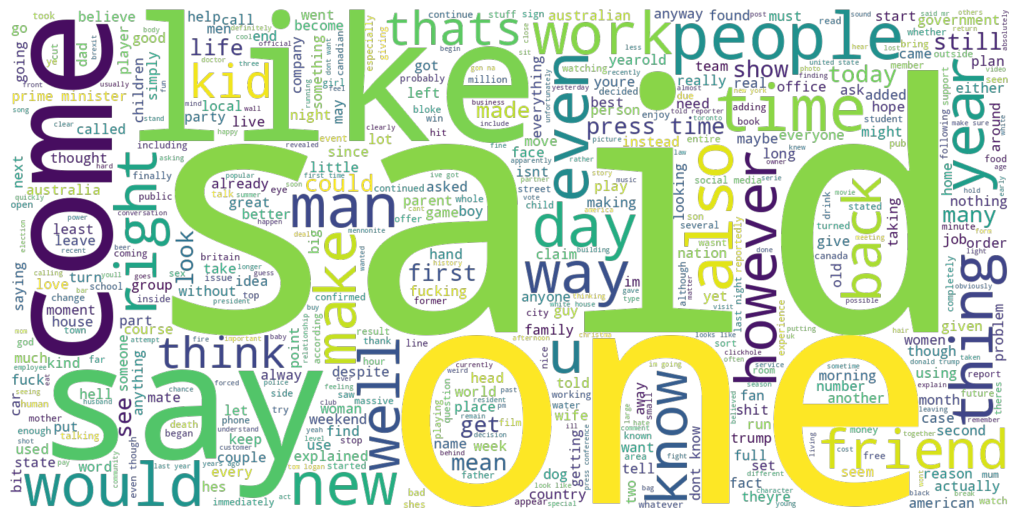

In [ ]:
text = " ".join(df[df['label'] == 1]['text'])

wordcloud = WordCloud(
    max_words = 500,
    width = 1600,
    height=800,
    background_color=None,
    mode="RGBA",
    stopwords=set(stopwords.words("english"))
).generate(text)

fig = plt.figure(
    figsize=(10, 10),
    facecolor='none',
    edgecolor='none'
)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### wordcloud for real news ###

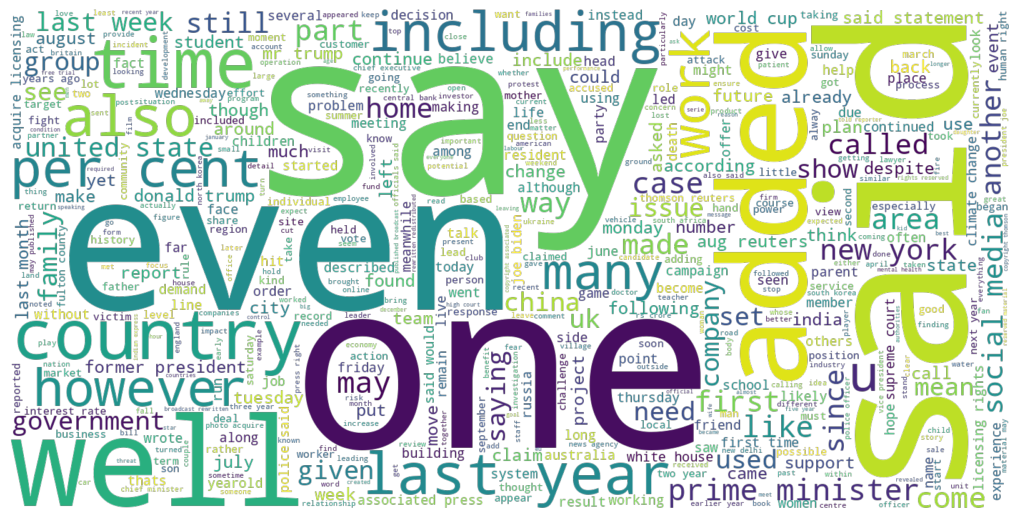

In [ ]:
text = " ".join(df[df['label'] == 0]['text'])
wordcloud = WordCloud(
    max_words = 500,
    width = 1600,
    height=800,
    background_color=None,
    mode="RGBA",
    stopwords=set(stopwords.words("english"))
).generate(text)

fig = plt.figure(
    figsize=(10, 10),
    facecolor='none',
    edgecolor='none'
)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
X = df['text']
# label of real news as 0 and for fake news as 1
y = df['label']
z = df['newspaper']

In [ ]:
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.2, random_state=0, stratify=z)
X_train, X_val, y_train, y_val, z_train, z_val = train_test_split(X_train, y_train, z_train, test_size=0.2, random_state=0, stratify= z_train)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(61924,)
(15481,)
(19352,)
(61924,)
(15481,)
(19352,)


In [ ]:
maxlen = 700
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_train= pad_sequences(X_train, maxlen = maxlen, padding="post", truncating="post")

X_test = tokenizer.texts_to_sequences(X_test)
X_test= pad_sequences(X_test, maxlen = maxlen, padding="post", truncating="post")

X_val = tokenizer.texts_to_sequences(X_val)
X_val= pad_sequences(X_val, maxlen = maxlen, padding="post", truncating="post")

In [ ]:
tokenizer.word_index

{'said': 1,
 'one': 2,
 'people': 3,
 'would': 4,
 'also': 5,
 'like': 6,
 'new': 7,
 'time': 8,
 'us': 9,
 'year': 10,
 'could': 11,
 'get': 12,
 'last': 13,
 'years': 14,
 'first': 15,
 'two': 16,
 'government': 17,
 'even': 18,
 'state': 19,
 'told': 20,
 'back': 21,
 'day': 22,
 'trump': 23,
 'police': 24,
 'president': 25,
 'make': 26,
 'going': 27,
 'many': 28,
 'world': 29,
 'dont': 30,
 'since': 31,
 'says': 32,
 'made': 33,
 'may': 34,
 'know': 35,
 'around': 36,
 'still': 37,
 'former': 38,
 'im': 39,
 'mr': 40,
 'way': 41,
 'news': 42,
 'home': 43,
 'take': 44,
 'according': 45,
 'work': 46,
 'well': 47,
 'go': 48,
 'say': 49,
 'three': 50,
 'minister': 51,
 'come': 52,
 'week': 53,
 'man': 54,
 'country': 55,
 'including': 56,
 'much': 57,
 'think': 58,
 'court': 59,
 'see': 60,
 'really': 61,
 'got': 62,
 'need': 63,
 'local': 64,
 'want': 65,
 'house': 66,
 'public': 67,
 'next': 68,
 'every': 69,
 'good': 70,
 'another': 71,
 'case': 72,
 'family': 73,
 'added': 74,
 'li

In [ ]:
X_train[0]

array([ 64593,   5332,    137,   9122,   8396, 147363,  64593,   5332,
          105,    416,    137,   5370,  18299,   8396,  60530,   2063,
         4093,      1,   1834,    837,  95384,  14655,   2071,      6,
          100,  69431,    653,    308,    519,   1258,    160,  28139,
         2873,      5,   4638,    280,    966,  10173,   6720,      2,
        60531,    180,  20676,  51888,  13472,   1738,   4235,  25097,
         7426,     74,    508,    243,    416,    380,    796,   2865,
        28588,      1,    213,   2743,  64594,    317,    250,  15743,
        19897,    266,   6150,    508,    359,     48,   3415,     30,
          664,  35449,    514,   2716,   1407, 147364,   1243,    123,
           54,  21530,    659,    524,    562,    576,   2147,    462,
        25430,  11073,   1336,   2687,   1212,    403,   1334,    462,
         2456,   1634,   8693,     78,    661,  44356,      1,     15,
         1029,     58,    274,  14997,     61,    100,    505,      8,
      

In [ ]:
# Adding +1 for unknown words
vocab_size = len(tokenizer.word_index) + 1
vocab_size

265770

In [ ]:
def load_glove_vectors():
    embeddings_index = {}
    with open('/content/drive/MyDrive/glove.6B.100d.txt',encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print('Loaded %s word vectors.' % len(embeddings_index))
    return embeddings_index

embeddings_index = load_glove_vectors()

Loaded 400000 word vectors.


In [ ]:
embeddings_index['paper']

array([-0.85034  ,  0.33358  , -0.65889  , -0.49871  ,  0.36585  ,
       -0.19245  ,  0.25658  , -0.053408 ,  0.31474  ,  0.2443   ,
        0.29337  , -0.44917  ,  0.15175  ,  0.39314  , -0.31786  ,
        0.060525 ,  0.81775  , -0.38847  ,  0.76761  , -1.1041   ,
       -0.1544   ,  0.31655  , -0.37238  , -0.11485  ,  0.51635  ,
       -0.39289  ,  0.16301  , -0.2532   , -0.50976  ,  0.15201  ,
        0.27808  ,  0.52522  , -0.38815  , -0.3472   , -0.61818  ,
        0.17022  ,  0.12251  , -0.24191  , -0.38877  , -0.53176  ,
       -0.46987  , -0.70502  , -0.62126  , -0.38689  , -0.85637  ,
       -0.41003  , -0.47487  , -0.21083  , -0.81338  , -0.52398  ,
        0.49894  ,  0.37909  ,  0.55428  ,  1.123    , -0.42121  ,
       -1.5674   , -0.56892  ,  0.40819  ,  1.7949   ,  0.16856  ,
       -0.0029332,  0.28786  , -0.90088  , -0.094214 ,  0.79993  ,
       -0.39096  ,  0.76286  ,  0.71307  ,  0.13194  , -0.40756  ,
       -0.18687  ,  0.89562  ,  0.46867  , -0.0028801,  0.0253

In [ ]:
dim=100
vocab = tokenizer.word_index
embedding_matrix = np.zeros((vocab_size, dim))
for word, i in vocab.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(265770, 100)

In [ ]:
# early stopping
early_stopping =EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1)
callbacks_list = [early_stopping]

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=dim, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Conv1D(filters= 64, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 700, 100)          26577000  
                                                                 
 conv1d_6 (Conv1D)           (None, 698, 64)           19264     
                                                                 
 global_max_pooling1d_3 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                      

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, callbacks=callbacks_list)

Epoch 1/15
1936/1936 [==============================] - 12s 5ms/step - loss: 0.3958 - accuracy: 0.9321 - val_loss: 0.2076 - val_accuracy: 0.9649
Epoch 2/15
1936/1936 [==============================] - 10s 5ms/step - loss: 0.1998 - accuracy: 0.9655 - val_loss: 0.1810 - val_accuracy: 0.9673
Epoch 3/15
1936/1936 [==============================] - 11s 6ms/step - loss: 0.1787 - accuracy: 0.9682 - val_loss: 0.1596 - val_accuracy: 0.9737
Epoch 4/15
1936/1936 [==============================] - 11s 5ms/step - loss: 0.1663 - accuracy: 0.9710 - val_loss: 0.1523 - val_accuracy: 0.9758
Epoch 5/15
1936/1936 [==============================] - 9s 5ms/step - loss: 0.1635 - accuracy: 0.9708 - val_loss: 0.1453 - val_accuracy: 0.9756
Epoch 6/15
1936/1936 [==============================] - 10s 5ms/step - loss: 0.1587 - accuracy: 0.9715 - val_loss: 0.1506 - val_accuracy: 0.9743
Epoch 7/15
1936/1936 [==============================] - 10s 5ms/step - loss: 0.1554 - accuracy: 0.9719 - val_loss: 0.1385 - val_acc

In [ ]:
print("Accuracy Score (Training): " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy Score (Test): " , model.evaluate(X_test,y_test)[1]*100 , "%")

1936/1936 [==============================] - 6s 3ms/step - loss: 0.1252 - accuracy: 0.9823
Accuracy Score (Training):  98.23170304298401 %
605/605 [==============================] - 2s 3ms/step - loss: 0.1406 - accuracy: 0.9755
Accuracy Score (Test):  97.55064249038696 %


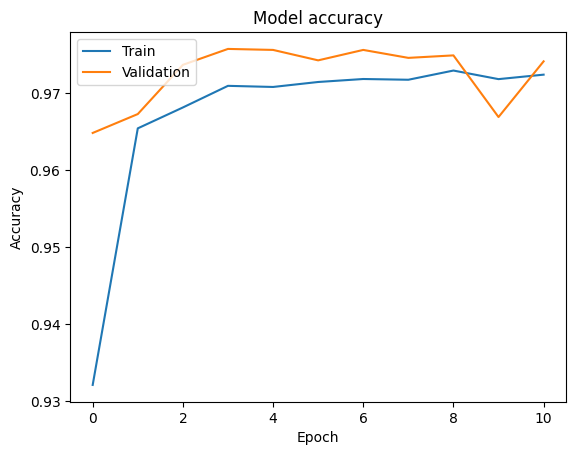

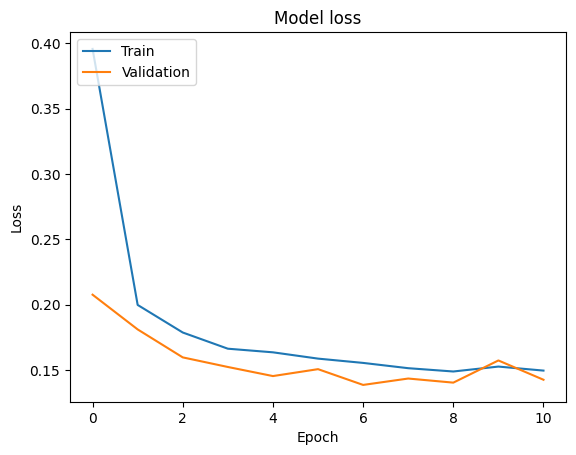

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

605/605 [==============================] - 2s 2ms/step


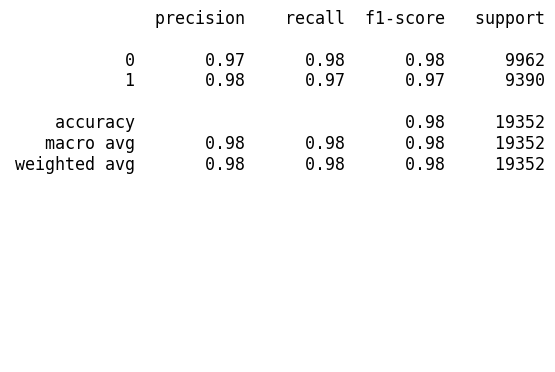

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.text(0.01, 0.5, report, {'fontsize': 12}, fontfamily='monospace')
plt.axis('off')
plt.tight_layout()
plt.show()

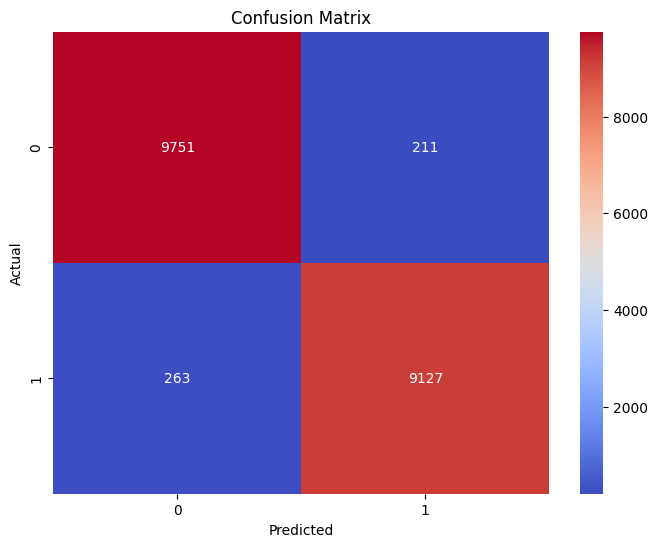

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.975405497225987


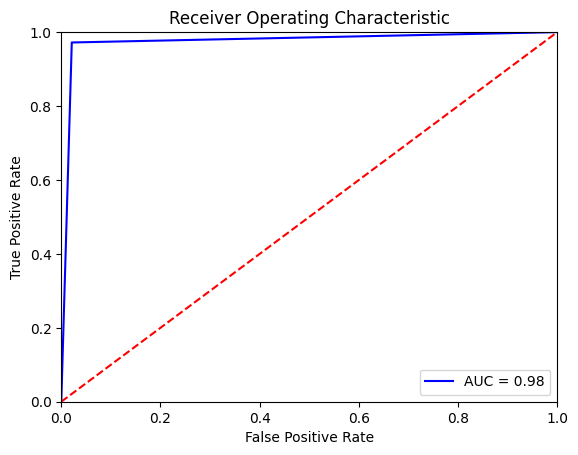

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
with open('tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f)

In [ ]:
model.save('model.h5')

In [ ]:
X = ['''A merchant ship has left the Ukrainian port of Odesa, despite concerns Russia could target vessels in the Black Sea.

The Hong Kong-flagged Joseph Schulte had been trapped in the port since Russia launched its full-scale invasion of Ukraine in February 2022.

Kyiv has announced a "humanitarian corridor" in the Black Sea after a deal collapsed last month which had allowed it to export grain.

But Moscow has not said whether it will respect the corridor.

The ship left as Kyiv said Russian air strikes damaged grain storage facilities in Reni, a river port on the Danube River, about 260km (160 miles) south-west of Odesa.

Ukrainian officials released photos showing destroyed storage facilities and piles of scattered grain and sunflowers in Reni, on Ukraine's border with Moldova and Romania.

An industry source told Reuters the port was continuing operations.

Russia has not commented on the latest attack.

Last month Russia pulled out of a deal guaranteeing safe passage for exports across the Black Sea, and said any ship heading for Ukrainian ports could be considered a military target.

Earlier this week it fired warning shots at a ship travelling towards Ukraine.

Ukraine is a major grain and oilseeds exporter, and the blockade has contributed to raising food prices globally.Despite the threats, Ukraine last week announced a humanitarian corridor in the Black Sea to allow ships to leave its ports, promising full transparency to make clear they were serving no military purpose.

"A first vessel used the temporary corridor for merchant ships to/from the ports of Great Odesa," Deputy Prime Minister Oleksandr Kubrakov said on Facebook.

Bernhard Schulte Shipmanagement, which jointly owns the Joseph Schulte with a Chinese bank, confirmed the ship was travelling to Istanbul, Turkey, Reuters reports.

It was carrying more than 30,000 tonnes of cargo, including food, in 2,114 containers, Mr Kubrakov said, adding that the corridor would mainly be used to evacuate ships trapped in Black Sea ports since Russia's full-scale invasion began.

Meanwhile, Ukrainian officials announced the capture of Urozhaine, a small hamlet in Donetsk region, from Russian forces.”''']

In [ ]:
X = tokenizer.texts_to_sequences(X)
print(X)
X = pad_sequences(X,maxlen=700,padding="post", truncating="post")
print(X)
val = model.predict(X)
print(val)
print(( val >= 0.5).astype(int))
if val >= 0.5:
    print("The news is fake.")
else:
    print("The news is real.")

[[10799, 2506, 141, 638, 2117, 8728, 227, 532, 181, 11, 1048, 3795, 235, 671, 2213, 2455, 6217, 4248, 24158, 3421, 2117, 31, 181, 897, 294, 2261, 1483, 166, 1056, 1773, 237, 3451, 5004, 235, 671, 256, 3365, 13, 118, 730, 2731, 2214, 948, 1, 179, 1592, 5004, 2506, 141, 1773, 1, 183, 286, 2163, 2011, 2214, 2836, 2057, 30845, 1287, 2117, 9481, 1287, 837, 121, 333, 8728, 638, 127, 395, 1499, 1215, 1658, 2836, 2057, 10433, 9167, 2214, 29798, 30845, 747, 13756, 5766, 480, 1042, 20, 115, 2117, 2131, 1207, 181, 4998, 367, 465, 13, 118, 181, 1878, 256, 19442, 699, 5109, 2025, 105, 235, 671, 1, 2506, 2649, 638, 3694, 11, 1005, 199, 1048, 189, 53, 1913, 1184, 3035, 2506, 3100, 758, 166, 166, 273, 2214, 25399, 10108, 8581, 1788, 2027, 283, 432, 4446, 227, 1825, 166, 13, 53, 237, 3451, 5004, 235, 671, 880, 3067, 410, 3694, 3665, 294, 4899, 26, 340, 2036, 199, 2478, 15, 3832, 107, 2300, 5004, 10799, 3067, 3694, 213, 8728, 963, 143, 51, 10968, 27014, 1, 871, 46707, 24158, 87689, 9021, 3562, 4248, 241